In [4]:
from IPython.display import display,Image,clear_output
import json
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import seaborn as sns
import random
import urllib.request
import h5py

from collections import Counter,defaultdict

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, InceptionV3
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.models import save_model


In [6]:
from keras import backend as K
K.backend()

'tensorflow'

## Using tensorflow as backend

In [7]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [8]:
# from Keras GitHub  
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

## Creating instances of model

In [9]:
vgg16 = VGG16(weights='imagenet')     # weights -> None,'imagenet' **None** implies random initialization while 'imagenet' species loading
                                      # weights pretrained on imagenet
resnet50 = ResNet50(weights='imagenet')
vgg19 = VGG19(weights='imagenet')
inception = InceptionV3(weights='imagenet')

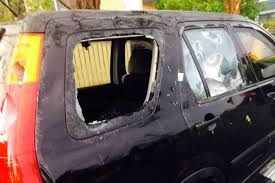

In [10]:
import os
import random
from IPython.display import Image

dataset = r'E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\00-damage'  # Using raw string
images = os.listdir(dataset)
img = random.choice(images)
dest_path = os.path.join(dataset, img)
Image(dest_path, width=200)

In [11]:
def prepare_image(img_path):
    img = load_img(path=img_path,target_size=(224,224))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = preprocess_input(x)         #?
    return x

In [12]:
y = prepare_image(dest_path)
preds = vgg16.predict(y)
print(get_predictions(preds,top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[('n04252225', 'snowplow', 0.29097638), ('n04461696', 'tow_truck', 0.19670674), ('n03930630', 'pickup', 0.09010942), ('n03384352', 'forklift', 0.08631509), ('n03594945', 'jeep', 0.050654124)]]


In [13]:
preds = resnet50.predict(y)
print(get_predictions(preds,top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[('n03594945', 'jeep', 0.35857666), ('n03770679', 'minivan', 0.2843015), ('n02704792', 'amphibian', 0.15286872), ('n03930630', 'pickup', 0.07273125), ('n04252225', 'snowplow', 0.033156868)]]


In [14]:
preds = vgg19.predict(y)
print(get_predictions(preds,top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
[[('n04252225', 'snowplow', 0.39578733), ('n03417042', 'garbage_truck', 0.16932076), ('n03594945', 'jeep', 0.093046665), ('n04461696', 'tow_truck', 0.07267037), ('n03769881', 'minibus', 0.053393696)]]


Using VGG16 and ResNet50 as gate 

In [15]:
vgg16.save('vgg16.h5')

In [16]:

img_list = os.listdir(r'E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training')
img_list


['00-damage', '01-whole']

In [17]:
img_paths = []
img_list = os.listdir(r'E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training')

# Populate img_paths with all images in each directory
for x in img_list:
    img_paths += os.listdir(os.path.join(r'E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training', x))

# Update img_paths with full paths for '01-whole' images
whole_dir = r'E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole'
img_paths[:len(os.listdir(whole_dir))] = [os.path.join(whole_dir, x) for x in img_paths[:len(os.listdir(whole_dir))]]

# Update img_paths with full paths for '00-damage' images
damage_dir = r'E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\00-damage'
img_paths[len(os.listdir(damage_dir)):] = [os.path.join(damage_dir, x) for x in img_paths[len(os.listdir(damage_dir)):]]

img_paths


['E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0001.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0002.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0003.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0004.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0005.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0006.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0007.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0008.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0009.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-dataset\\data1a\\training\\01-whole\\0010.JPEG',
 'E:\\code\\Car_damage_evaluation\\car-damage-data

In [18]:
from collections import defaultdict, Counter
import os

def get_car_categories():
    d = defaultdict(float)
    img_paths = []
    
    # Generate the full paths for images in '01-whole' and '00-damage'
    whole_dir = r'E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole'
    damage_dir = r'E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\00-damage'
    
    img_paths += [os.path.join(whole_dir, img) for img in os.listdir(whole_dir)]
    img_paths += [os.path.join(damage_dir, img) for img in os.listdir(damage_dir)]

    for i, img_path in enumerate(img_paths):
        if not os.path.exists(img_path):
            print(f"File not found: {img_path}")
            continue  # Skip this file if not found

        try:
            img = prepare_image(img_path)  # Load and preprocess the image
            out = vgg16.predict(img)
            top = get_predictions(out, top=5)
            for j in top[0]:
                d[j[0:2]] += j[2]
            
            if i % 50 == 0:
                print(i, '/', len(img_paths), 'complete')
        
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    return Counter(d)


In [19]:
cat_counter = get_car_categories()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
0 / 1840 complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━

In [20]:
cat_counter

Counter({('n03770679', 'minivan'): 256.30046359808966,
         ('n04285008', 'sports_car'): 151.6288941083476,
         ('n03100240', 'convertible'): 119.63724795624148,
         ('n02814533', 'beach_wagon'): 100.1366789034073,
         ('n03930630', 'pickup'): 98.92788816324901,
         ('n03670208', 'limousine'): 88.42152780364268,
         ('n04461696', 'tow_truck'): 64.93724456697237,
         ('n03594945', 'jeep'): 54.62334679171909,
         ('n04037443', 'racer'): 54.50100354658207,
         ('n02974003', 'car_wheel'): 45.19217115607171,
         ('n03459775', 'grille'): 37.70208197089596,
         ('n04252225', 'snowplow'): 35.19271364470478,
         ('n03769881', 'minibus'): 32.94667005963856,
         ('n02930766', 'cab'): 30.680187159450725,
         ('n03796401', 'moving_van'): 23.89979570871219,
         ('n03977966', 'police_van'): 21.694973332283553,
         ('n03445924', 'golfcart'): 18.26543017756194,
         ('n03417042', 'garbage_truck'): 17.578993660397828,
   

In [21]:
cat_list = [k for k, v in cat_counter.most_common()[:48]]

In [22]:
cat_counter.most_common()[:48]

[(('n03770679', 'minivan'), 256.30046359808966),
 (('n04285008', 'sports_car'), 151.6288941083476),
 (('n03100240', 'convertible'), 119.63724795624148),
 (('n02814533', 'beach_wagon'), 100.1366789034073),
 (('n03930630', 'pickup'), 98.92788816324901),
 (('n03670208', 'limousine'), 88.42152780364268),
 (('n04461696', 'tow_truck'), 64.93724456697237),
 (('n03594945', 'jeep'), 54.62334679171909),
 (('n04037443', 'racer'), 54.50100354658207),
 (('n02974003', 'car_wheel'), 45.19217115607171),
 (('n03459775', 'grille'), 37.70208197089596),
 (('n04252225', 'snowplow'), 35.19271364470478),
 (('n03769881', 'minibus'), 32.94667005963856),
 (('n02930766', 'cab'), 30.680187159450725),
 (('n03796401', 'moving_van'), 23.89979570871219),
 (('n03977966', 'police_van'), 21.694973332283553),
 (('n03445924', 'golfcart'), 18.26543017756194),
 (('n03417042', 'garbage_truck'), 17.578993660397828),
 (('n02701002', 'ambulance'), 12.253133928752504),
 (('n03791053', 'motor_scooter'), 11.640069771558046),
 (('n

In [23]:
cat_list

[('n03770679', 'minivan'),
 ('n04285008', 'sports_car'),
 ('n03100240', 'convertible'),
 ('n02814533', 'beach_wagon'),
 ('n03930630', 'pickup'),
 ('n03670208', 'limousine'),
 ('n04461696', 'tow_truck'),
 ('n03594945', 'jeep'),
 ('n04037443', 'racer'),
 ('n02974003', 'car_wheel'),
 ('n03459775', 'grille'),
 ('n04252225', 'snowplow'),
 ('n03769881', 'minibus'),
 ('n02930766', 'cab'),
 ('n03796401', 'moving_van'),
 ('n03977966', 'police_van'),
 ('n03445924', 'golfcart'),
 ('n03417042', 'garbage_truck'),
 ('n02701002', 'ambulance'),
 ('n03791053', 'motor_scooter'),
 ('n03478589', 'half_track'),
 ('n02704792', 'amphibian'),
 ('n04252077', 'snowmobile'),
 ('n04467665', 'trailer_truck'),
 ('n03777568', 'Model_T'),
 ('n02965783', 'car_mirror'),
 ('n02917067', 'bullet_train'),
 ('n04065272', 'recreational_vehicle'),
 ('n03345487', 'fire_engine'),
 ('n04465501', 'tractor'),
 ('n03127747', 'crash_helmet'),
 ('n03891332', 'parking_meter'),
 ('n02747177', 'ashcan'),
 ('n04389033', 'tank'),
 ('n0364

Load Pickle Point

In [24]:
with open('cat_counter.pk','wb') as f:
    pickle.dump(cat_counter,f,-1)

In [25]:
with open('cat_counter.pk','rb') as f:
    cat_counter = pickle.load(f)

In [26]:
cat_list = [k for k,v in cat_counter.most_common()[:48]]

In [27]:
cat_list

[('n03770679', 'minivan'),
 ('n04285008', 'sports_car'),
 ('n03100240', 'convertible'),
 ('n02814533', 'beach_wagon'),
 ('n03930630', 'pickup'),
 ('n03670208', 'limousine'),
 ('n04461696', 'tow_truck'),
 ('n03594945', 'jeep'),
 ('n04037443', 'racer'),
 ('n02974003', 'car_wheel'),
 ('n03459775', 'grille'),
 ('n04252225', 'snowplow'),
 ('n03769881', 'minibus'),
 ('n02930766', 'cab'),
 ('n03796401', 'moving_van'),
 ('n03977966', 'police_van'),
 ('n03445924', 'golfcart'),
 ('n03417042', 'garbage_truck'),
 ('n02701002', 'ambulance'),
 ('n03791053', 'motor_scooter'),
 ('n03478589', 'half_track'),
 ('n02704792', 'amphibian'),
 ('n04252077', 'snowmobile'),
 ('n04467665', 'trailer_truck'),
 ('n03777568', 'Model_T'),
 ('n02965783', 'car_mirror'),
 ('n02917067', 'bullet_train'),
 ('n04065272', 'recreational_vehicle'),
 ('n03345487', 'fire_engine'),
 ('n04465501', 'tractor'),
 ('n03127747', 'crash_helmet'),
 ('n03891332', 'parking_meter'),
 ('n02747177', 'ashcan'),
 ('n04389033', 'tank'),
 ('n0364

In [28]:
with open('vgg16_cat_list.pk','wb') as f:
    pickle.dump(cat_list,f,-1)

Evaluating Car Categories from Imagenet

In [29]:
from collections import Counter

def get_car_categories_with_cat_list(cat_list):
    num = 0
    bad_list = []
    
    for i, img_path in enumerate(img_paths):
        if not os.path.exists(img_path):
            print(f"File not found: {img_path}")
            continue  # Skip missing files
        
        try:
            img = prepare_image(img_path)  # Preprocess the image
            out = vgg16.predict(img)
            top = get_predictions(out, top=5)
            
            # Check if any of the top categories match `cat_list`
            for j in top[0]:
                if j[0:2] in cat_list:
                    num += 1
                    break  # Found a match, break the inner loop
            else:
                bad_list.append(img_path)  # Only if no matches are found

            # Print progress every 100 images
            if i % 100 == 0:
                print(i, '/', len(img_paths), 'complete')
        
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    # Filter out items in `bad_list` that occur exactly 5 times
    bad_list = [k for k, v in Counter(bad_list).items() if v == 5]

    return num, bad_list


In [30]:
number, bad_list = get_car_categories_with_cat_list(cat_list)

File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0001.JPEG
File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0002.JPEG
File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0003.JPEG
File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0004.JPEG
File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0005.JPEG
File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0006.JPEG
File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0007.JPEG
File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0008.JPEG
File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0009.JPEG
File not found: E:\code\Car_damage_evaluation\car-damage-dataset\data1a\training\01-whole\0010.JPEG


Select top 50 as cutoff for category list

In [31]:
def get_image_path(img_path):
    """Helper function to check for common file extensions if the file is missing."""
    base, ext = os.path.splitext(img_path)
    for extension in ['.JPEG', '.jpeg', '.jpg']:
        corrected_path = base + extension
        if os.path.exists(corrected_path):
            return corrected_path
    print(f"File not found with any common extension: {img_path}")
    return None

In [32]:
def view_images(img_paths):
    for img in img_paths:
        img_path = get_image_path(img)
        if img_path is None:
            continue  # Skip this file if no valid file path is found
        
        clear_output(wait=True)
        display(Image(img_path, width=200))
        
        num = input("c to continue, q to quit: ")
        if num.lower() == 'c':
            pass
        else:
            return 'Finished for now.'

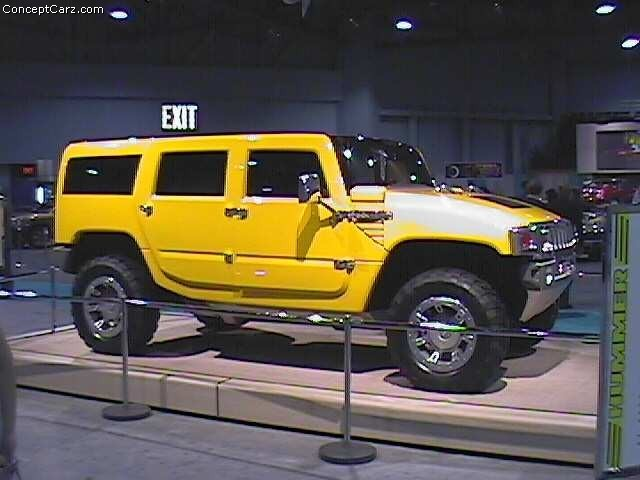

'Finished for now.'

In [33]:
view_images(img_paths)

In [34]:
def car_categories_gate(img_url,cat_list):
    urllib.request.urlretrieve(img_url,'save.jpg')
    x = prepare_image('save.jpg')
    out = vgg16.predict(x)
    top = get_predictions(out,top=5)
    print("Validating that this is a picture of your car...")
    for j in top[0]:
        if j[0:2] in cat_list:
            print(j[0:2])
            return "Validation complete - proceed to damage evaluation"
    return "Are you sure this is a picture of your car? Please take another picture \
(try a different angle or lighting) and try again."

In [37]:
car_categories_gate('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzC2Ud9yhiisJllYzBErpY-HYWGLoaY04akQ&s', cat_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Validating that this is a picture of your car...
('n02930766', 'cab')


'Validation complete - proceed to damage evaluation'

In [38]:
car_categories_gate('data:image/webp;base64,UklGRoYJAABXRUJQVlA4IHoJAADwMgCdASriAJsAPolEnEqlI6KkphUpoKARCWdu3lF3Tac6MAlmP0jYvRHbdfaLMBh2cm77oZOjy3gK/et+UR+ZRdqtGse/sLRx1pa2SoEXY0VPJvgCblAhgxTCrjhrS9xozAq77pvS1N5f8HvObXkW+/1p3jk7UEeRwWULhnTPr1KbM4AiP1cfrtX7HCQ1JGYTYSk4+6XNG5HKtuc5h8YlntAhPcjvlh2X/xk0scP1+9r8UbhU95zElldbeJrWbwz09Yj6ZnXEY78/uNDyBqsHNT8BB3UW8wlbleWTO/VvtaqSllQtTgcX0vRMgw2Y7MiKXqcb15aTcP+9m2mciVBtmLUD8tvJ7qnppMAlXD/K3fdy3H1ZxkHUjA7OTHr2+RKSCNIngnuzvGLpyAmRISsTyjjzwxTmrk0nIh5uj6xsMSBEpzoZsI7a7rcJB7OPiP6QGcORBQGwaNUlIqijR7dLfqbfAD5kqYKb0JMeNXoHm5HBTmb1JgFXy5VZgLntdjbKqYHv/nm+FEZ2hIc3xmm+Wh6/H8uwiJWdK23NCxywsAD++oHRXI/L1UCz10ucBPq9FoJrStvHoEUNqE6lrsMhaW7ywyN77CS/qEkO8LwcpSBrQ5iPUGcG9HOYFLx6TSKlg2z6zXRLTJFqvkb+Hiw1fihQ9FpgD9s5cDF/QhNpNdZrQHcnzGAAxo6ltF4rFKcKqtMGX65sOcK1rG1CoGDe3/fO3LeGms1pDv8hBAI08e3WDeh7U5CPD9pOheNFZFjHcSf5IAXdzCHJKkKJWf05qwug56M8kWmGEGHmqt9tVATPL+l8N0xtNSBjqd6Nxcw9TKCZGajUXlxTOu+LP1xteLifNmazbOFHcUJgyjrHySyQw9ISgIbLGKjgkTcBoEx2GKfzOlKlCM/pFXRNDDP3Hwug4bwITDmAghFyD8ghpZGyisWKJgH07rRpgzc8rvzEW5OjkuGVjYqvFXMog7r+5VQzYya/nypvZrwFV2Z1ZZ2cTirnwQB04Bx2WhxlUQuMdESF3/nCYGKOZx13kkJGeZwEoROiO5yo8SSKwL8U1oUiReIxERt7hBdi3BM6MW8i2CGF8lWU1FGe1iwAJGFnFMtDnZiCcjf/vuUeoPwQUQ+DuRPhqANoMX2FCoBcf/l8Ar+20BdrvDP7vmLiSXOmA/5HFYMQG9SaaNR95iwDTo+e0/RfGZEbWdcLCxAb3RZbEPU6cWWNTkoFLbSvKXIk37FYdL8fohEWm8x4wtm2HVkBGEGMqgHeA1b5yYHSiM51Il5bs9e/gpt8dmE+WNWc1EoM5X5FD55PUAEi1EQaet5OPFiGdX5pU/VbUUoe0OBmy4oMSGtSu0J3cYNVLnAXfj5oP9wWnyW/l1wypFr1HQMIWGSBEY5Ndn8j6nYDmmZQm8oqu4l10920c37ZWMtjkQ8QVsmec0n74VO7lk0KmnYyFQwv6uXT4UgMOhOhhzk6stuI6boVTI0ipJgYvjBCBAokmc54107QbnPpL/yrAQfADvUBOZU6nelpIR25hUv2+b6pfEzoP3V/bEBa1CUKHLVBECzm6Z6pN6R4D+IPR9xrKHviAm8/ZL1dddeCx6brnMN4NZK0ciwPGXmCPRwINkR64VdXKNxs0S4CYq9XhiZI88NKJWT/O84FetfQJbpLGNINKUDvbFj0oLfBDcK2iaOe8iLtRZwonMOhr1T/mbITKaHNx3EVl30E3UDLCKPy0li2LePGr28xI2c2u9DO5Nm9FqeN4erHpx/3jM5Jzt3lrFU3+6nwtbPREJM4hRR7XWCPzI+ga3HIjXGstAYh881XAFZ57WoUGxqHe/Y6r1YPqA/ZjqvN6wWKjUSSK/r5CcnVJmRzCZu+RupPnCjjLUxg4lCZFq9QcqqpxvkhKOpppEnwXRNqiwcSt/vYoZmjkY2VUHfAzIUE/hiKbGEKWQlV8fBAzixiXzeIvN7wpbUm36ULY2eORfSBJbE0Ml3IGg5Tmm0yVATGbnSL+inU4MmUvv+tXCDhfkolg86HwqlT1llQZma57spoE8Y6g0YC8rZx5SUCG6qvH9F49EjcqihJkfQAoiaH2HXZaA+ATHey7wEWJHSZvhkxHW4Mi3hfDCDcjWORdwrEe166jENbIsgrxi33hSmj17swHEhEKE1OK+Roc5+nfhR0ZBId21uJPNY5XTCGOzOkcKZXLegmqDt7upGsqbALDPSFrhiOTPuiR1FeOsG/2uj9B9H1iqiIS0IoeEUOjueYq9ssePheKRmm2Z2Jq8WZrLIZxGuFeT9iesoFbKh9lBNvFRY6gowGyV7HDppnArHKA2WKhPAYW0M5YBpofJ8k/4Qaiiq5DDep6+gfJXf4HZQyAipseF+7g8yvfJgFC0PIpjHj0tFPLjTeMhWtZKmG966h0AT5nx6IOxKlz3mnUwHfx+6Rqhj3VrHiboFu04/H2SDgCVMt3akyBxEVAvNRKLpGqnxwD4UrATKxZX9x/RXuAPf45fI9eVGVjS5k72ATPumX7Rj7pspQxpmQ80Xx4te/IoXrzctWGaFSNDrvALOeQPANRbHHM6dQczn3PO5xUgmfmD+Qqny7EtSQyCAXebHSQNU06emyrx98e4ocXd9+QvgyjN+PJr4sRKHB0hMOIjIydhlJ+lPB0T8lW5Pr//kPzoLrVLWwk9pNnz6ZjUbSg4ANNIh+RPC1KBDkjbB16ln0Sox53bFsOag17MNHTBVqbrbUqu099wMOjipNp/uv1OHINgeUGfCMfy5qqDdd+MlyRhdpzlxPruzVa3CMlh3m/l+cths7jeucgbLyf3W+hFsdob6DJnLEj7hPTLtwT+BynpH4eMGcG3JfGkS1iH0YfmcvsqhKVTP/SRzEMM9aduCzO3xOglcFek5vJcDKiKRWoYZ/DS4Fhp+ST5HuXMZg9Fh0vXJo1m4hw2O3wEFDDyGlQDR1CHkwc2oOt8fCQIB+XdjwOYWcaORCOdKikOICAiP5mc56A8NZM7rAuzCHAOGA34wIkVbuewctIfQ2uC1wBaM0JAhauzSYAlQKSJWpaYL5fyE9x4t1tniUQkmxTMRt4O1JqmJF0pNUbc7G2ORiFFd4kZS1jsLJD4YkouWmz9xDB60LsqFMpXncPop5clUaMYHDMLQTj5GhWiJ7sh1RTWjJEOpfpzNFR26q80rcdq7jzmZL2QAJbFSaWlZmEzRFe7Rm12IzYs4dJm9KRXnx49mClyjAzuveIg1IAA==', cat_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Validating that this is a picture of your car...


'Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.'